#Install required libraries

In [2]:
# Install kagglehub if not already installed in the environment
!pip install kagglehub

#Download the dataset

In [4]:
import kagglehub
import pandas as pd

# Download the latest version of the hiring dataset from Kaggle
path = kagglehub.dataset_download("anaghakp/hiring-dataset")

# Print the path to the downloaded files for reference
print("Path to dataset files:", path)

# Load the CSV file into a pandas DataFrame
# Assuming the CSV file is named 'hiring.csv' based on standard dataset naming
df = pd.read_csv(f"{path}/hiring (1).csv")

# Display the first few rows to verify the data
df.head()

Using Colab cache for faster access to the 'hiring-dataset' dataset.
Path to dataset files: /kaggle/input/hiring-dataset


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


#Import necessary libraries

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visualization
sns.set(style="whitegrid")

#Explore the dataset (EDA)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes

Summary Statistics:
       test_score(out of 10)  interview_score(out of 10)    salary($)
count               7.000000                    8.000000      8.00000
mean                7.857143                    7.875000  63000.00000
std                 1.345185                    1.642081  11501.55269
min                 6.000000                    6.000000  45000.00000
25%                 7.000000                    6.750000  57500.00000
50%                 8.000000        

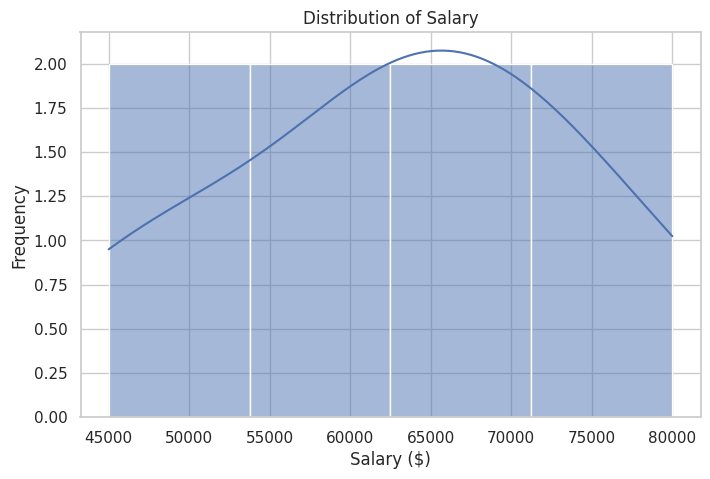

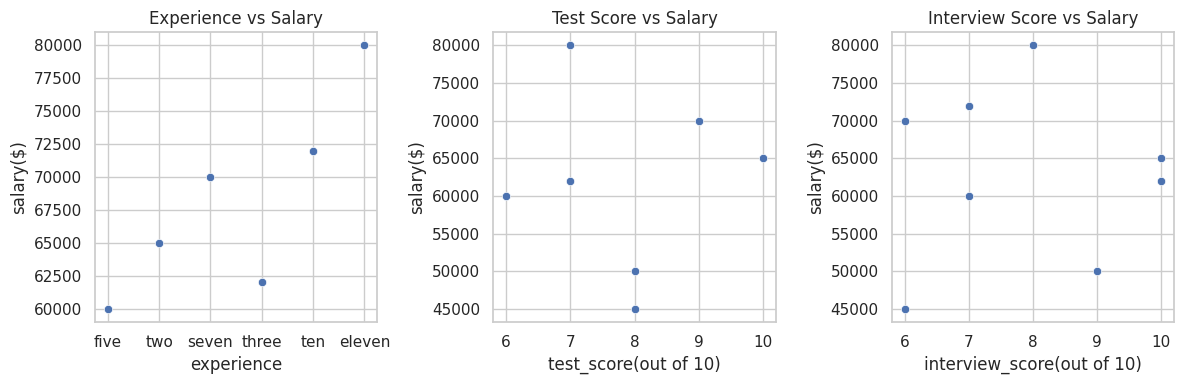

In [6]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of the target variable (salary)
plt.figure(figsize=(8, 5))
sns.histplot(df['salary($)'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features and salary
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='experience', y='salary($)', data=df)
plt.title('Experience vs Salary')

plt.subplot(1, 3, 2)
sns.scatterplot(x='test_score(out of 10)', y='salary($)', data=df)
plt.title('Test Score vs Salary')

plt.subplot(1, 3, 3)
sns.scatterplot(x='interview_score(out of 10)', y='salary($)', data=df)
plt.title('Interview Score vs Salary')

plt.tight_layout()
plt.show()

#Handle missing values and categorical features

In [13]:
# Fill missing values in 'test_score(out of 10)' with the median
median_test_score = df['test_score(out of 10)'].median()
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)

# Handle missing or blank experience by filling with 'zero'
df['experience'] = df['experience'].fillna('zero')

# Map experience strings to numerical values using a dictionary
experience_map = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15
}

# Apply the mapping to convert categorical experience to numeric
df['experience'] = df['experience'].map(experience_map)

# Drop any rows with remaining NaN values (if any, for safety)
df.dropna(inplace=True)

# Verify the changes
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)


#Prepare features and target, perform train/test split

In [8]:
# Define features (X) and target (y)
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6, 3)
Testing set shape: (2, 3)


#Train single-feature models

In [9]:
# Initialize a dictionary to store model results
results = {}

# Single-feature models
features = ['experience', 'test_score(out of 10)', 'interview_score(out of 10)']

for feature in features:
    # Prepare single feature data
    X_single_train = X_train[[feature]]
    X_single_test = X_test[[feature]]

    # Train the model
    model = LinearRegression()
    model.fit(X_single_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_single_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[f'Single_{feature}'] = {'RMSE': rmse, 'R2': r2, 'Model': model}

# Display single-feature results
for key, val in results.items():
    print(f"{key}: RMSE = {val['RMSE']:.2f}, R2 = {val['R2']:.2f}")

Single_experience: RMSE = 6238.45, R2 = 0.46
Single_test_score(out of 10): RMSE = 15254.33, R2 = -2.22
Single_interview_score(out of 10): RMSE = 18072.26, R2 = -3.52


#Train multiple-feature model

In [10]:
# Train the multiple-feature model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predict on test set
y_pred_multi = multi_model.predict(X_test)

# Evaluate
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r2_multi = r2_score(y_test, y_pred_multi)

# Store in results
results['Multiple_Features'] = {'RMSE': rmse_multi, 'R2': r2_multi, 'Model': multi_model}

# Display multiple-feature results
print(f"Multiple Features: RMSE = {rmse_multi:.2f}, R2 = {r2_multi:.2f}")

Multiple Features: RMSE = 2213.28, R2 = 0.93


#Compare models and select the best

In [11]:
# Compare all models based on RMSE (lower is better) and R2 (higher is better)
print("\nModel Comparison:")
for key, val in results.items():
    print(f"{key}: RMSE = {val['RMSE']:.2f}, R2 = {val['R2']:.2f}")

# Select the best model (lowest RMSE)
best_model_key = min(results, key=lambda k: results[k]['RMSE'])
best_model = results[best_model_key]['Model']

print(f"\nBest Model: {best_model_key} with RMSE = {results[best_model_key]['RMSE']:.2f}")


Model Comparison:
Single_experience: RMSE = 6238.45, R2 = 0.46
Single_test_score(out of 10): RMSE = 15254.33, R2 = -2.22
Single_interview_score(out of 10): RMSE = 18072.26, R2 = -3.52
Multiple_Features: RMSE = 2213.28, R2 = 0.93

Best Model: Multiple_Features with RMSE = 2213.28


#isualize predictions vs actual for the best model

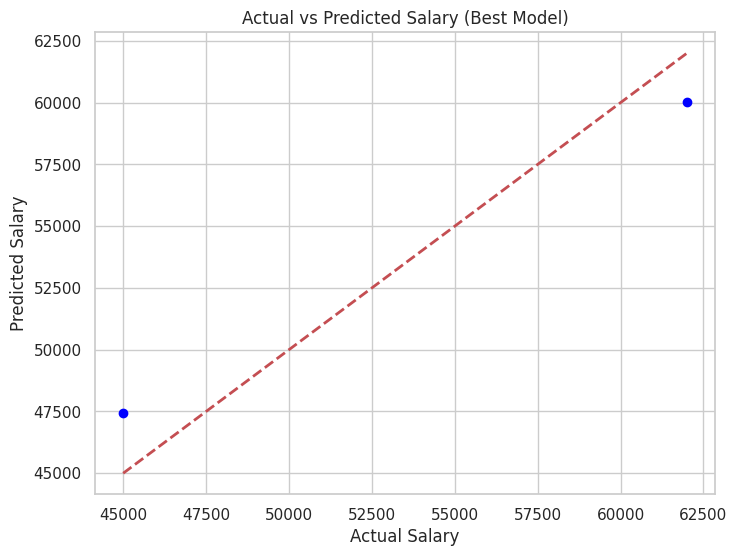

In [14]:
# Visualize predictions vs actual for the best model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Best Model)')
plt.show()

#Save the best model

In [12]:
# Save the best model to a file using joblib
joblib.dump(best_model, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
